## 해당 생선이 나올 확률 예측하기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./datasets/fish.csv', encoding = 'CP949')

In [3]:
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width']

In [4]:
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [5]:
target = data[['Species']]
data = data.drop(['Species'], axis = 1)

In [6]:
# 데이터 분리
data = data.to_numpy()
target = target.to_numpy()

In [7]:
# train, test 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target, random_state = 42)

In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 6)
(40, 6)
(119,)
(40,)


In [9]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

## 로지스틱 회귀
- 선형 방정식을 사용한 분류 알고리즘
- 0 ~ 1사이의 값을 분류하기위해 시그모이드 함수를 사용한다. (이진분류, 0.5보다 크면 양성, 작으면 음성) 
<br>
$$S(x) = {1 \over 1 + exp^{-x}}$$
<br>
<center> 시그모이드 함수

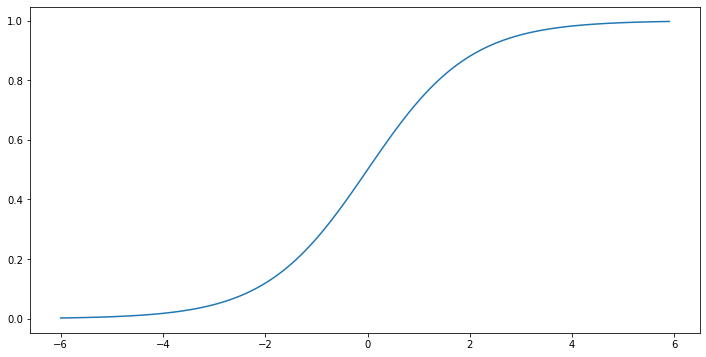

In [10]:
# 시그모이드 그래프
a = np.arange(-6,6,0.1)
result = []
for i in a :
    result.append(1/(1 + np.exp(1)**-i))
    
plt.figure(figsize = (12,6))
plt.plot(np.arange(-6,6,0.1),result)
plt.show()

### 도미와 빙어 구분하기

In [21]:
bream_smelt_idx = (y_train == 'Bream')|(y_train == 'Smelt')

In [25]:
# 도미와 빙어만 학습데이터에서 추출
fish_train = train_scaled[bream_smelt_idx]
fish_train_target = y_train[bream_smelt_idx]

In [26]:
# 이진 분류 모델 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(fish_train,fish_train_target)

LogisticRegression()

In [27]:
# 도미와 빙어가 나올 확률
print('    ',lr.classes_)
print(lr.predict_proba(fish_train[:5]))
print(fish_train_target[:5])

     ['Bream' 'Smelt']
[[0.99793528 0.00206472]
 [0.02390293 0.97609707]
 [0.99575366 0.00424634]
 [0.98765044 0.01234956]
 [0.9980632  0.0019368 ]]
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [28]:
# 로지스틱 회귀 계수
# 무게,길이1,2,3,높이,두께,절편
print(lr.coef_, lr.intercept_)

[[-0.36707083 -0.50388475 -0.52530414 -0.60537206 -0.92906093 -0.66884746]] [-2.35565567]


## 로지스틱으로 다중분류


### 로지스틱 회귀의 하이퍼파라미터 
***
**max_iter**: 로지스틱 회귀는 기본적으로 반복적인 알고리즘을 사용한다. 이때 max_iter로 반복 횟수를 지정해줄수 있다. 기본값은 100

**C**: 규제의 강도를 제어한다. 이 때 수치가 커질수록 규제도 커지던 **alpha**와 달리 **C**는 작을수록 규제가 커진다.

**Solver** : 기본값은 lbfgs(멀티클래스 분류에 주로 사용), liblinear(적은 용량), sag,saga(대용량)
***

In [29]:
# 로지스틱으로 다중분류 진행
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled,y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9411764705882353
0.925


In [30]:
# 처음 5마리 생선 종류 예측
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba,3))
print(lr.classes_)

[[0.    0.014 0.838 0.    0.138 0.007 0.003]
 [0.    0.002 0.042 0.    0.006 0.95  0.   ]
 [0.    0.    0.029 0.937 0.01  0.024 0.   ]
 [0.012 0.034 0.27  0.004 0.596 0.    0.084]
 [0.    0.    0.906 0.002 0.088 0.003 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


로지스틱 회귀를 활용한 이진분류는 확률 전환을 위해 **시그모이드 함수**를 사용했다.

다중분류를 사용할 때 역시 어떠한 함수를 거쳐야 하는데 이때 사용하는 함수가 바로 **소프트맥스 함수**이다.

시그모이드는 하나의 선형방정식의 출력값을 0 ~ 1사이로 압축한다면 소프트맥스는 여러개의 선형방정식 출력값을 0 ~ 1사이로 압축하고 전체 합이 1이 되도록 만든다.

먼저 z1 ~ z7까지의 값을 사용해 지수 함수 $e^{z1}$ ~ $e^{z7}$을 계산해 모두 더한다.
>$$essum = e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$$

그다음 $e^{z1}$ ~ $e^{z7}$을 각각 essum으로 나눈다.
>$$S1 = {e^{z1} \over essum},S2 = {e^{z2} \over essum},...S7 = {e^{z7} \over essum}$$

이때 s1에서 s7까지 더하면 분자 분모가 같아지므로 1이 된다.

In [31]:
# z값 출력
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, 2))

[[ -6.34   1.08   5.18  -3.14   3.37   0.35  -0.49]
 [-10.78   1.81   4.88  -2.81   2.97   8.    -4.09]
 [ -4.78  -6.84   3.37   6.84   2.3    3.16  -4.06]
 [ -0.56   0.5    2.58  -1.58   3.37  -5.72   1.41]
 [ -6.35  -2.07   5.86  -0.39   3.52   0.07  -0.64]]


In [32]:
# 소프트맥스 계산
from scipy.special import softmax
proba = softmax(decision, axis = 1) # axis를 지정하지 않을 경우 배열 전체에 대한 소프트맥스 계산
print(np.round(proba,3))

[[0.    0.014 0.838 0.    0.138 0.007 0.003]
 [0.    0.002 0.042 0.    0.006 0.95  0.   ]
 [0.    0.    0.029 0.937 0.01  0.024 0.   ]
 [0.012 0.034 0.27  0.004 0.596 0.    0.084]
 [0.    0.    0.906 0.002 0.088 0.003 0.001]]
